# ** Airbnb Data - Exloratory Data Analysis and Price Prediction **

Load and examine the data 

In [2]:
import pandas as pd
import numpy as np 
abb = pd.read_csv('AB_US_2020.csv')

abb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.651460,-82.627920,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.597790,-82.555400,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.606700,-82.555630,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.578640,-82.595780,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.614420,-82.541270,Private room,125,30,58,19/10/15,0.52,1,0,Asheville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226025,45506143,"DC Hidden In Plain ""Site""",25973146,Marci,NaN,"Downtown, Chinatown, Penn Quarters, Mount Vern...",38.903880,-77.029730,Entire home/apt,104,1,0,NaN,NaN,2,99,Washington D.C.
226026,45511428,DC 3 BR w/ screen porch 3 blck to metro w/ par...,231133074,Thomas,NaN,"Brookland, Brentwood, Langdon",38.920820,-76.990980,Entire home/apt,151,2,0,NaN,NaN,1,300,Washington D.C.
226027,45514685,Charming Penthouse Apt w/ Rooftop Terrace in L...,33758935,Bassem,NaN,"Shaw, Logan Circle",38.911170,-77.033540,Entire home/apt,240,2,0,NaN,NaN,1,173,Washington D.C.
226028,45516412,Adams Morgan/Nat'l Zoo 1 BR Apt #32,23193071,Michael,NaN,"Kalorama Heights, Adams Morgan, Lanier Heights",38.926630,-77.044360,Entire home/apt,60,21,0,NaN,NaN,5,362,Washington D.C.


In [3]:
abb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226030 entries, 0 to 226029
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              226030 non-null  int64  
 1   name                            226002 non-null  object 
 2   host_id                         226030 non-null  int64  
 3   host_name                       225997 non-null  object 
 4   neighbourhood_group             110185 non-null  object 
 5   neighbourhood                   226030 non-null  object 
 6   latitude                        226030 non-null  float64
 7   longitude                       226030 non-null  float64
 8   room_type                       226030 non-null  object 
 9   price                           226030 non-null  int64  
 10  minimum_nights                  226030 non-null  int64  
 11  number_of_reviews               226030 non-null  int64  
 12  last_review     

In [4]:
abb.isnull().sum()

id                                     0
name                                  28
host_id                                0
host_name                             33
neighbourhood_group               115845
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                        48602
reviews_per_month                  48602
calculated_host_listings_count         0
availability_365                       0
city                                   0
dtype: int64

Taking a quick look at the data, we can see that over half of the neighborhood_group column is null. There are ways of dealing with this, but since it's so much of the data, we will just drop this column. 

In [27]:
df = abb.drop(['neighbourhood_group'], axis=1)

In [34]:
df.nunique()

id                                110273
name                              108349
host_id                            76642
host_name                          20333
neighbourhood                       1422
latitude                           83702
longitude                          82102
room_type                              4
price                                431
minimum_nights                        29
number_of_reviews                    118
last_review                         2258
reviews_per_month                    439
calculated_host_listings_count        35
availability_365                     366
city                                  28
dtype: int64

In [22]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.260300e+05,2.260300e+05,226030.000000,226030.000000,226030.000000,2.260300e+05,226030.000000,177428.00000,226030.000000,226030.000000
mean,2.547176e+07,9.352385e+07,35.662829,-103.220662,219.716529,4.525490e+02,34.506530,1.43145,16.698562,159.314856
std,1.317814e+07,9.827422e+07,6.849855,26.222091,570.353609,2.103376e+05,63.602914,1.68321,51.068966,140.179628
min,1.090000e+02,2.300000e+01,18.920990,-159.714900,0.000000,1.000000e+00,0.000000,0.01000,1.000000,0.000000
25%,1.515890e+07,1.399275e+07,32.761783,-118.598115,75.000000,1.000000e+00,1.000000,0.23000,1.000000,0.000000
50%,2.590916e+07,5.138266e+07,37.261125,-97.817200,121.000000,2.000000e+00,8.000000,0.81000,2.000000,140.000000
75%,3.772624e+07,1.497179e+08,40.724038,-76.919322,201.000000,7.000000e+00,39.000000,2.06000,6.000000,311.000000
max,4.556085e+07,3.679176e+08,47.734620,-70.995950,24999.000000,1.000000e+08,966.000000,44.06000,593.000000,365.000000


### Preprocessing Categorical Data

For the rest of the categorical columns, we can use label encoding to take care of the null values

In [35]:
categorical_cols = [col for col in df.columns if df[col].dtype=="object" and df[col].nunique() < 40]

categorical_cols

['room_type', 'city']

In [37]:
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()

label_df = df.copy()

for col in categorical_cols:
    label_df[col] = label_encoder.fit_transform(df[col])


In [40]:
label_df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
5,209068,Terrace Cottage,1029919,Kevin,28804,35.61856,-82.55276,0,134,7,54,14/01/20,0.49,1,294,0
7,246315,Asheville Dreamer's Cabin,1292070,Annie,28805,35.59635,-82.50655,2,65,3,57,30/10/19,0.53,2,106,0
12,427497,Luxurious Mountain Guest Suite Apartment,1909922,Milan,28803,35.49111,-82.48438,0,125,2,40,17/08/20,0.42,1,339,0
20,634319,Private Asheville Cabin Apartment,1202653,Jim And Jan,28805,35.62839,-82.47989,0,150,3,30,01/09/19,0.31,1,266,0
24,720609,City Vibe Loft,427027,Celeste,28801,35.59787,-82.55336,0,312,1,88,30/08/20,0.91,11,345,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225936,45326130,Modern and cozy home located in Washington DC,55489711,Amir,"Union Station, Stanton Park, Kingman Park",38.90101,-77.00283,0,144,1,1,18/09/20,1.00,1,328,27
225950,45349877,Penthouse w/ Patio ‚òÜ Capitol Hill Condo ‚òÜ ...,3850096,Ije,"Capitol Hill, Lincoln Park",38.88703,-77.00586,0,132,2,1,16/09/20,1.00,8,162,27
225955,45352724,MODERN ‚òÜ Well-Located Shaw Town Home ‚òÜ 2BR...,3850096,Ije,"Howard University, Le Droit Park, Cardozo/Shaw",38.91626,-77.02074,0,112,2,1,13/09/20,1.00,8,171,27
225964,45385834,Brand new modern apartment with private entry,16561471,Victor,"Brightwood Park, Crestwood, Petworth",38.94358,-77.01283,0,78,1,1,19/09/20,1.00,1,75,27


### Visualizing the Distributions

<br>


Next we can take a look at the distributions of the numerical columns. This can give us a better understanding of the numerical data and possibly identify outliers. 

In [38]:
numerical_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]

numerical_cols.remove('id')

numerical_cols


['host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

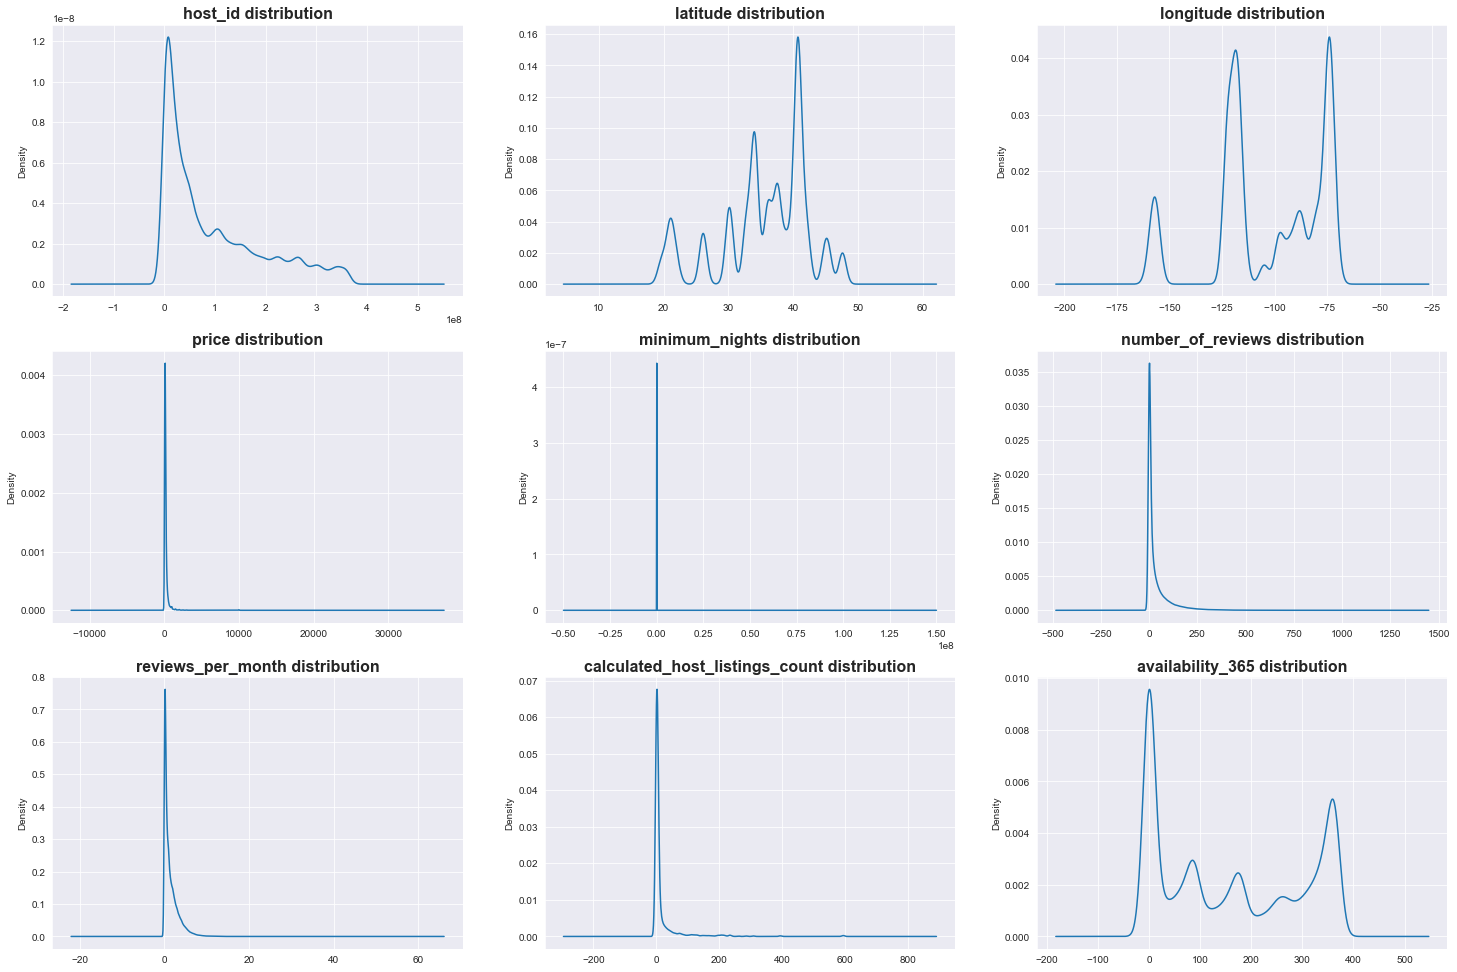

In [8]:


import seaborn as sns
import matplotlib.pyplot as plt

#stylizing grid
sns.set_style("darkgrid")
fig, axes = plt.subplots(nrows=3, ncols=3)

#graph dimensions
fig.set_figheight(17)
fig.set_figwidth(25)

i=0
for row in axes:
    for col in row:
        df[numerical_cols[i]].plot(kind='kde', ax=col)
        col.set_title(numerical_cols[i] + ' distribution', fontsize=16, fontweight='bold')
        i +=1



From these we see that many of the distributions are skewed due to outliers. This will definitely affect our accuracy when model fitting. To solve this, we can set upper bounds on the necessary columns to remove the outliers. 

In [28]:
#removing outliers

#first make a list of the columns w/ skewed distributions due to outliers

columns = ['price','minimum_nights','calculated_host_listings_count', 'reviews_per_month', 'number_of_reviews']

for col in columns:
    upper_bound = df[col].quantile(0.92)
    print('92 percent of ',col,'values are under ', upper_bound)
    df = df[df[col] < upper_bound]


df = df[df.price.notnull()]

92 percent of  price values are under  438.0
92 percent of  minimum_nights values are under  30.0
92 percent of  calculated_host_listings_count values are under  36.0
92 percent of  reviews_per_month values are under  4.4
92 percent of  number_of_reviews values are under  119.0


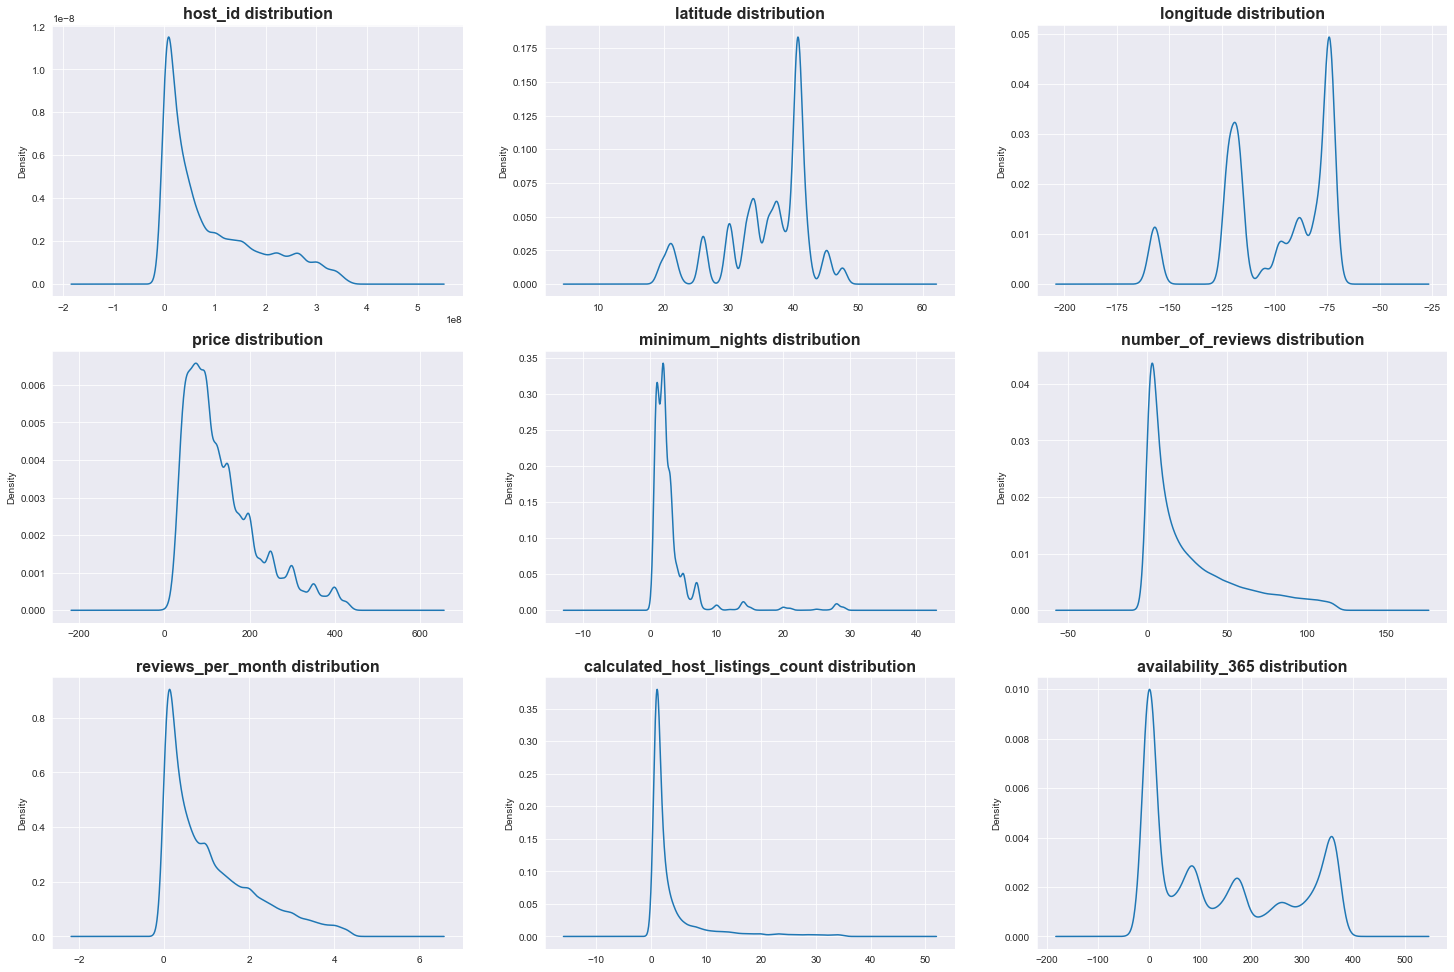

In [31]:
#now we can look at the distributions again

fig, axes = plt.subplots(nrows=3, ncols=3)

fig.set_figheight(17)
fig.set_figwidth(25)

i=0
for row in axes:
    for col in row:
        df[numerical_cols[i]].plot(kind='kde', ax=col)
        col.set_title(numerical_cols[i] + ' distribution', fontsize=16, fontweight='bold')
        i +=1

The visualizations above show that the distributions look a lot better than before. Now we can move on to model fitting 

### Splitting the data into training and test sets. 

In [44]:
#split data

from sklearn.model_selection import train_test_split

y = label_df.price
X = label_df.drop(['price'], axis=1)

X_train_full, X_test_full, y_train, y_test = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state=0)

In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer

numerical_cols = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype in ['int64', 'float64']]

numerical_transformer = SimpleImputer(strategy='mean')

#categorical data already preprocessed
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols)
    ]
)


### Linear Regression 

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('scaler', MinMaxScaler()),
                                ('model', model)])

my_pipeline.fit(X_train_full, y_train)

lin_preds = my_pipeline.predict(X_test_full)

mse = mean_squared_error(y_test, lin_preds)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, lin_preds)
print('R2 Score',r2)


MSE: 5497.32572300552
RMSE: 74.14395270691683
R2 Score 0.2838917267537836


### Random Forest Regressor 

In [56]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('scaler', MinMaxScaler()),
                                ('model', model)])

my_pipeline.fit(X_train_full, y_train)

rf_preds = my_pipeline.predict(X_test_full)


mse = mean_squared_error(y_test, rf_preds)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, lin_preds)
print('R2 Score',r2)

MSE: 4259.163883863071
RMSE: 65.26226998705356
R2 Score 0.2838917267537836
